In [4]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
safe = pd.read_csv('data/safe-sac-failure.csv')
sac = pd.read_csv('data/sac-failure.csv')

Text(0.5, 0.98, 'Failure rate during training')

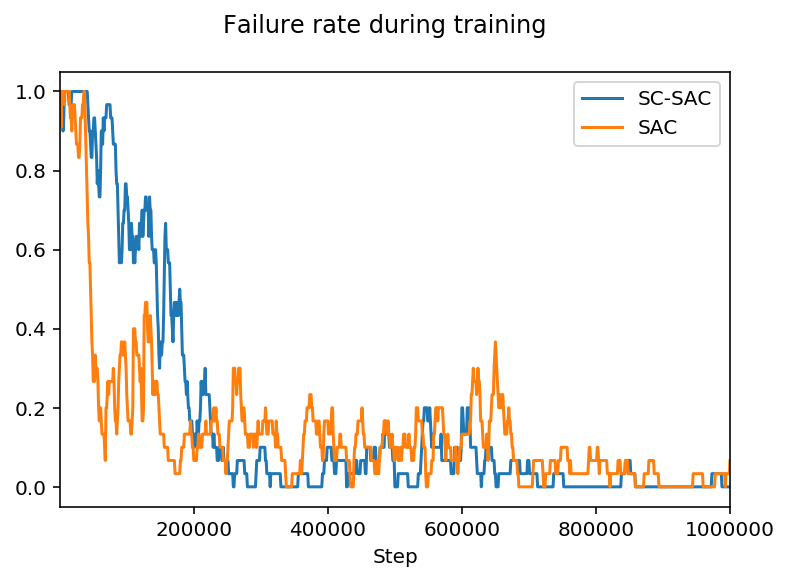

In [7]:
safe['SC-SAC'] = safe['Value']
sac['SAC'] = sac['Value']
f, ax = plt.subplots(1,1)
safe.plot(x='Step', y='SC-SAC', ax=ax)
sac.plot(x='Step', y='SAC', ax=ax)
plt.suptitle('Failure rate during training')

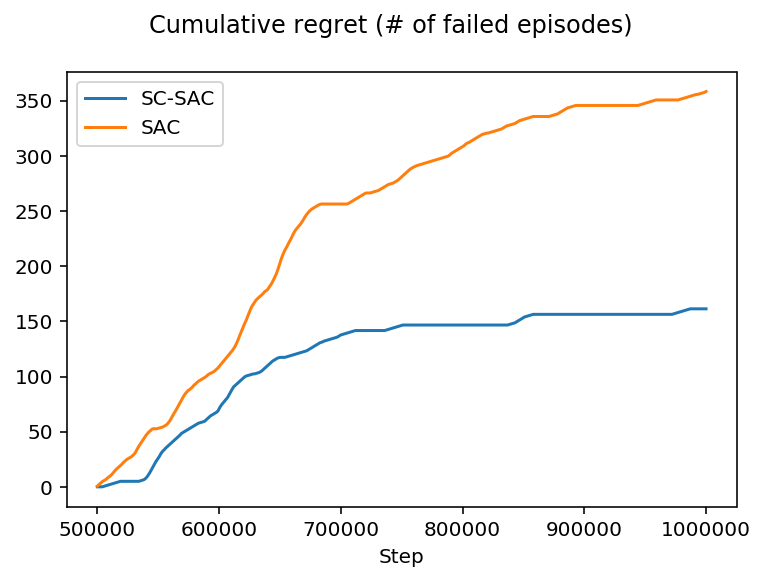

In [9]:
# safe['0.5-step velocity jumps'] = safe['Value']
# sac['0.1-step velocity jumps'] = sac['Value']

safe_reg = safe.loc[safe.Step >= 500000]['Value'].cumsum() * 10
sac_reg = sac.loc[safe.Step >= 500000]['Value'].cumsum() * 10

# f, ax = plt.subplots(1,1)
plt.plot(safe.loc[safe.Step >= 500000].Step, safe_reg, label='SC-SAC')
plt.plot(safe.loc[safe.Step >= 500000].Step, sac_reg, label='SAC')
plt.xlabel('Step')
plt.legend()
plt.suptitle('Cumulative regret (# of failed episodes)')
plt.show()

In [7]:
fail = pd.read_csv('data/eplen-failure.csv')
ret = pd.read_csv('data/sc-eplen-return.csv')

In [2]:
scret = pd.read_csv('data/sc-return.csv')
sacret = pd.read_csv('data/train-return.csv')

In [3]:
add = sacret.Value[20:30] * .25+100 + np.concatenate([np.random.sample(5)*10, np.zeros(5)])
# sacret[20:30].plot(x="Step", y="Value")

In [4]:
add = np.concatenate([add, add[-4:] + 1*np.random.sample()*(add[-5:-4].values[0] - add[-4:]),
                        add[-4:] + 1*np.random.sample()*(add[-5:-4].values[0] - add[-4:])])

In [9]:
len(np.concatenate([sacret['sc'].values, add]))

68

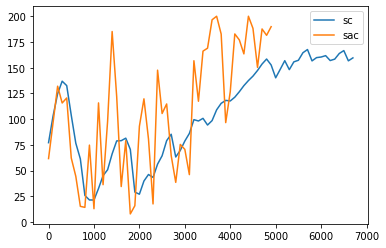

In [13]:
plt.plot(np.concatenate([sacret['sc'].values, add]), label='sc')
plt.plot(scret['sac'], label='sac')
plt.legend()
plt.xticks(np.arange(8)*10, labels=np.arange(8)*1000)

plt.show()

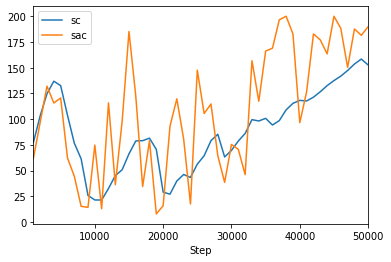

In [6]:
scret['sac'] = .5*(scret['Value'] - 100)
sacret['sc'] = .5*(sacret['Value'] - 100)

f, ax = plt.subplots(1,1)

sacret.plot(x='Step', y='sc',ax=ax)
scret.plot(x='Step', y='sac',ax=ax)

Text(0, 0.5, 'return')

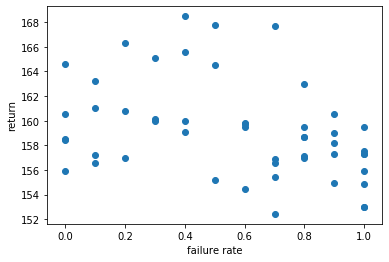

In [16]:
plt.scatter(fail['Value'], ret['Value'] - ret['Value'].min() * 15)
plt.xlabel('failure rate')
plt.ylabel('return')